# 생능출판사 "따라하며 배우는 파이썬과 데이터과학" 코드 14장
## chapter 14
### 기계학습으로 똑똑한 컴퓨터를 만들자

### 14.4 가장 간단한 회귀 : 선형 회귀 분석

#### 선형회귀를 사이킷런 라이브러리로 구현해 보자

In [2]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

regr = linear_model.LinearRegression()

In [3]:
X = [[164], [179], [162], [170]]  # 다중회귀에도 사용하도록 함 
y = [53, 63, 55, 59]              # y = f(X)의 결과 
regr.fit(X, y)

LinearRegression()

### 14.5 선형회귀로 예측하기 : 키와 몸무게는 상관관계가 있을까

#### 선형회귀 학습결과를 확인하고 예측하기

In [4]:
regr.fit(X, y)

LinearRegression()

In [5]:
coef = regr.coef_               # 직선의 기울기
intercept = regr.intercept_     # 직선의 절편
score = regr.score(X, y)        # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y =", coef, "* X + ", intercept)
print("The score of this line for the data: ", score)

y = [0.55221745] * X +  -35.686695278969964
The score of this line for the data:  0.903203123105647


In [6]:
input_data = [ [180], [185] ]

In [7]:
result = regr.predict(input_data) 
print(result)

[63.71244635 66.47353362]


#### 선형회귀 모델로 예측하기

In [8]:
regr.predict([[169]])

array([57.63805436])

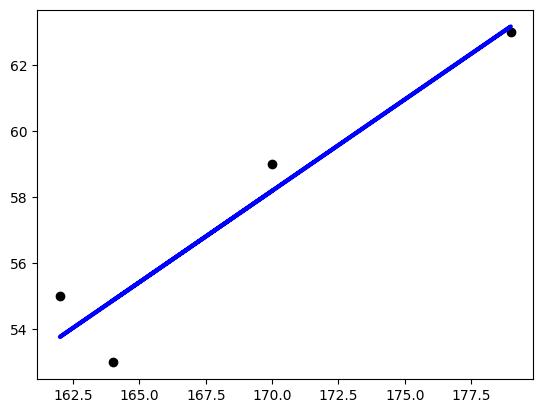

In [9]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다
 
regr = linear_model.LinearRegression() 
 
X = [[164], [179], [162], [170]]  # 선형회귀의 입력은 2차원으로 만들어야 함
y = [53, 63, 55, 59]              # y = f(X)의 결과값
regr.fit(X, y)

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X, y, color='black')
# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = regr.predict(X)
# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다 
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

### LAB 14-1 키가 비슷해도 남, 여의 몸무게는 다를 것 : 다차원 선형회귀

In [10]:
import numpy as np 
from sklearn import linear_model 
 
regr = linear_model.LinearRegression() 

# 남자는 0, 여자는 1을 넣어 차원을 추가하였음
# 입력데이터를 2차원으로 만들어야 함
X = [[164, 1], [167, 1], [165, 0], [170, 0], [179, 0], [163, 1], [159, 0], [166, 1]]  
y = [43, 48, 47, 66, 67, 50, 52, 44]    # y 값은 1차원 데이터
regr.fit(X, y)                          # 학습 
print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('은지와 동민이의 추정 몸무게 :', regr.predict([[166, 1], [166, 0]]))

계수 : [ 0.88542825 -8.87235818]
절편 : -90.97330367074522
점수 : 0.7404546306026769
은지와 동민이의 추정 몸무게 : [47.13542825 56.00778643]


### LAB 14-2 주택의 실면적과 대중교통 접근성 그리고 가격

In [11]:
import numpy as np
from sklearn import linear_model

regr = linear_model.LinearRegression()
# 입력데이터를 다음과 같이 2차원으로 만들어야 함
X = [[85, 6],[76, 5],[50, 4],[44, 3],[57, 4],[88, 5],[78, 7],[97, 7],[45, 3], [76, 6]]
y = [8.9, 7.7, 3.1, 1.8, 6.7, 9.5, 8.4, 12.2, 2.3, 8.5]     # y 값은 1차원 데이터 
regr.fit(X, y)      # 학습
print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('실면적 65 m^2, 접근성 점수 5 :', regr.predict([[65, 5]]))
print('실면적 75 m^2, 접근성 점수 5 :', regr.predict([[75, 5]]))

계수 : [0.15613505 0.2656739 ]
절편 : -5.285369201207788
점수 : 0.9455485534480466
실면적 65 m^2, 접근성 점수 5 : [6.19177875]
실면적 75 m^2, 접근성 점수 5 : [7.75312929]


### 14.6 사이킷런의 당뇨병 예제와 학습 데이터 생성

In [12]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn import datasets 
 
# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽어들인다. 
diabetes = datasets.load_diabetes()

In [13]:
print('shape of diabetes.data: ', diabetes.data.shape)
print(diabetes.data)

shape of diabetes.data:  (442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [14]:
print('입력데이터의 특성들')
print(diabetes.feature_names)

입력데이터의 특성들
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [15]:
print('target data y:', diabetes.target.shape)
print(diabetes.target)

target data y: (442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91.

In [16]:
X = diabetes.data[:, 2]
print(X)        # (442, ) 형태의 행렬이 출력됨 - 선형회귀의 입력데이터로 부적합

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

In [17]:
X = diabetes.data[:, np.newaxis, 2] # 배열의 차원을 증가시킴 
print(X)                            # (442, 1) 형태의 행렬이 되었는가 확인

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

### 14.7 체질량지수와 당뇨수치는 어떤 상관관계가 있을까

In [18]:
regr.fit(X, diabetes.target)         # 학습을 통한 선형회귀 모델을 생성 
print(regr.coef_, regr.intercept_)

[949.43526038] 152.13348416289617


In [19]:
# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2)

In [20]:
# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data[:,np.newaxis,2],
                                                    diabetes.target,
                                                    test_size=0.2) 
regr = LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
score = regr.score(X_train, y_train)    # 학습용 데이터의 적합 점수
print(score)
score = regr.score(X_test, y_test)      # 테스트용 데이터의 적합 점수
print(score)

0.33762996255954336
0.3689329726145426


### 14.8 당뇨병 예제를 학습 데이터와 테스트 데이터로 구분하자

In [22]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)     # 테스트용 데이터로 예측해보자.

In [23]:
print(y_pred)
print(y_test)

[148.25551775  94.51686313 171.92127397 115.26474387 206.23179154
 226.04448935 183.0154622  154.406868   209.69633484 131.21776406
 102.92144218 131.19119051 237.12693095 179.86063476 106.69261166
 187.88728321 143.97094462  57.66301703 165.41603757 183.36775028
 114.99335914 117.91399085 125.64156974 174.81099655 244.25389645
 261.02401745  75.48551482  64.29232266  94.03653652 122.55999788
  76.30303129  95.58898782 181.55141239 219.4655084  166.66853542
 153.1081369  105.54065304 202.7194524  220.25388846  63.15159926
  31.31035594 109.95782452 157.47547627 237.45793341 108.93624484
 203.51646707 158.39334371 171.43103528  78.76114069 218.56098097
 207.97451603 250.30035087 103.73903113 180.24987945 146.50784691
 168.93899889 143.98843467  67.63340585  58.94784414 294.40813095
  96.2230991   69.38450531  65.1083488  231.27392552  57.75386169
 153.53278856 256.13427682 103.22733177 244.03833288 180.98168529
  83.18848595 193.5522726   27.05678748 122.31838093  65.84875073
 104.44095

### LAB 14-3 데이터 80%로 학습하여 예측한 결과와 실제 데이터 비교

[  44.77420617 -259.58235506  514.80907981  348.64199546 -859.91766619
  396.01414849  101.34297229  281.05706923  716.35695584   54.86425326] 151.8322710600054


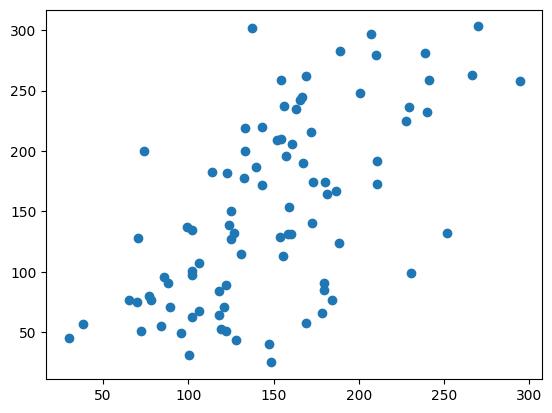

In [24]:
import numpy as np
from sklearn import linear_model    # scikit-learn 모듈을 가져온다 
from sklearn import datasets
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes()
regr = linear_model.LinearRegression()
# 학습 데이터와 테스트 데이터를 분리한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

regr.fit(X_train, y_train) 
print(regr.coef_, regr.intercept_)

y_pred = regr.predict(X_test)

plt.scatter(y_pred, y_test) 
plt.show()

### 14.9 알고리즘이 가지는 오차

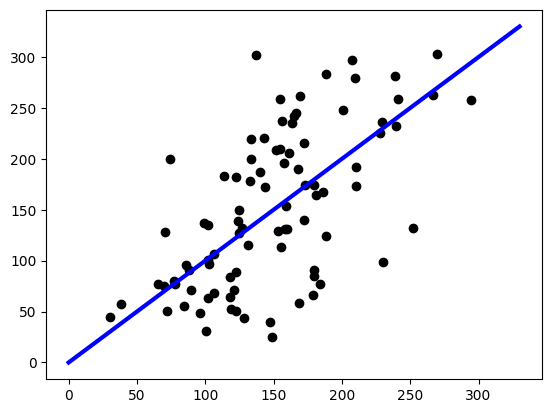

In [25]:
plt.scatter(y_pred, y_test,  color='black')

x = np.linspace(0, 330, 100)  # 특정 구간의 점 
plt.plot(x, x, linewidth = 3, color = 'blue')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

... # 이전 절에서 구한 선형회귀 모델의 코드를 삽입함

print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 3654.386973549591


### 14.11 k-NN 알고리즘을 이용한 분류

#### 아름다운 붓꽃의 종류를 분류할 준비를 해보자

In [27]:
from sklearn.datasets import load_iris 
iris = load_iris() 
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [28]:
iris.data.shape

(150, 4)

### 14.12 k-NN 알고리즘을 적용할 데이터를 살펴보자 

In [29]:
print(iris.feature_names)   # 4개의 특징 이름을 출력한다.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [30]:
# 정수는 꽃의 종류를 나타낸다.: 0 = setosa, 1=versicolor, 2=virginica 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### k-NN 알고리즘을 적용해보자

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
# 학습용 데이터와 테스트 데이터를 (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2)

In [34]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

num_neigh = 1
knn = KNeighborsClassifier(n_neighbors = num_neigh)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 1일때 정확도: 0.967


### 14.13 새로운 꽃에 대해서 모델을 적용하고 분류해 보자

In [35]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
 
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(iris.data, iris.target) 

KNeighborsClassifier(n_neighbors=6)

In [36]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 아직 보지 못한 새로운 데이터를 제시해 보자. 
X = [[3,4,5,2], [5,4,2,2]]
y = knn.predict(X)

print(classes[y[0]])    # 새로운 특성값을 가지는 데이터에 대한 예측값을 출력 
print(classes[y[1]])

versicolor
setosa


#### 분류기의 정확도를 자세히 알아보자

In [37]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all) 
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 1일때 정확도: 0.973


(array([[50.,  0.,  0.],
        [ 0., 48.,  2.],
        [ 0.,  2., 48.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x16ab06350>)

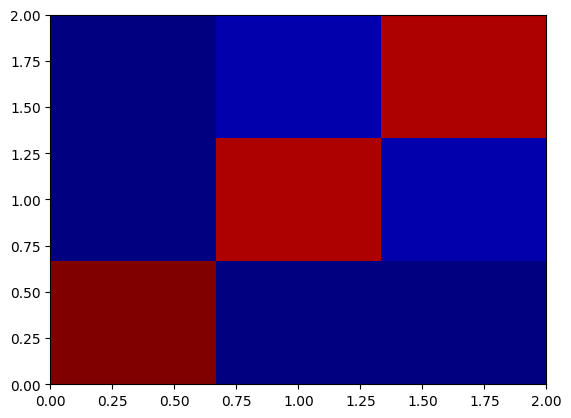

In [38]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)

In [39]:
from sklearn.metrics import confusion_matrix 
conf_mat = confusion_matrix(iris.target, y_pred_all) 
conf_mat

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])

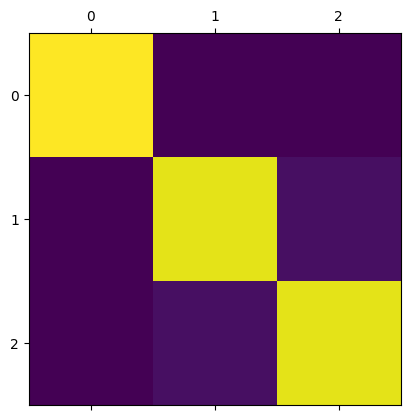

In [40]:
plt.matshow(conf_mat)

### 14.14 사례 분석 – 선형회귀 : 기대수명 예측하기

#### 기대수명 데이터 읽어오기와 결측 확인하기

In [44]:
import pandas as pd
import seaborn as sns   # 시각화를 위하여 Seaborn 라이브러리를 이용함

life = pd.read_csv('d:/data/life_expectancy.csv')
print(life.head())

FileNotFoundError: [Errno 2] No such file or directory: 'd:/data/life_expectancy.csv'

In [42]:
life = pd.read_csv('https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/Life_expectancy.csv')

In [43]:
life = life[['Life expectancy', 'Year', 'Alcohol', 'Percentage expenditure', 'Total expenditure', 'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years', 'Thinness 5-9 years']] 
print(life)

      Life expectancy  Year  Alcohol  Percentage expenditure  \
0                65.0  2015     0.01               71.279624   
1                59.9  2014     0.01               73.523582   
2                59.9  2013     0.01               73.219243   
3                59.5  2012     0.01               78.184215   
4                59.2  2011     0.01                7.097109   
...               ...   ...      ...                     ...   
2933             44.3  2004     4.36                0.000000   
2934             44.5  2003     4.06                0.000000   
2935             44.8  2002     4.43                0.000000   
2936             45.3  2001     1.72                0.000000   
2937             46.0  2000     1.68                0.000000   

      Total expenditure  Hepatitis B  Measles  Polio   BMI         GDP  \
0                  8.16         65.0     1154    6.0  19.1  584.259210   
1                  8.18         62.0      492   58.0  18.6  612.696514   
2        

In [45]:
print(life.shape) 
print(life.isnull().sum())

(2938, 12)
Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64


In [46]:
life.dropna(inplace = True)     # 데이터 정제하기 
print(life.shape)

(1853, 12)


### 14.15 각 특징들 사이의 상관관계를 살펴보자

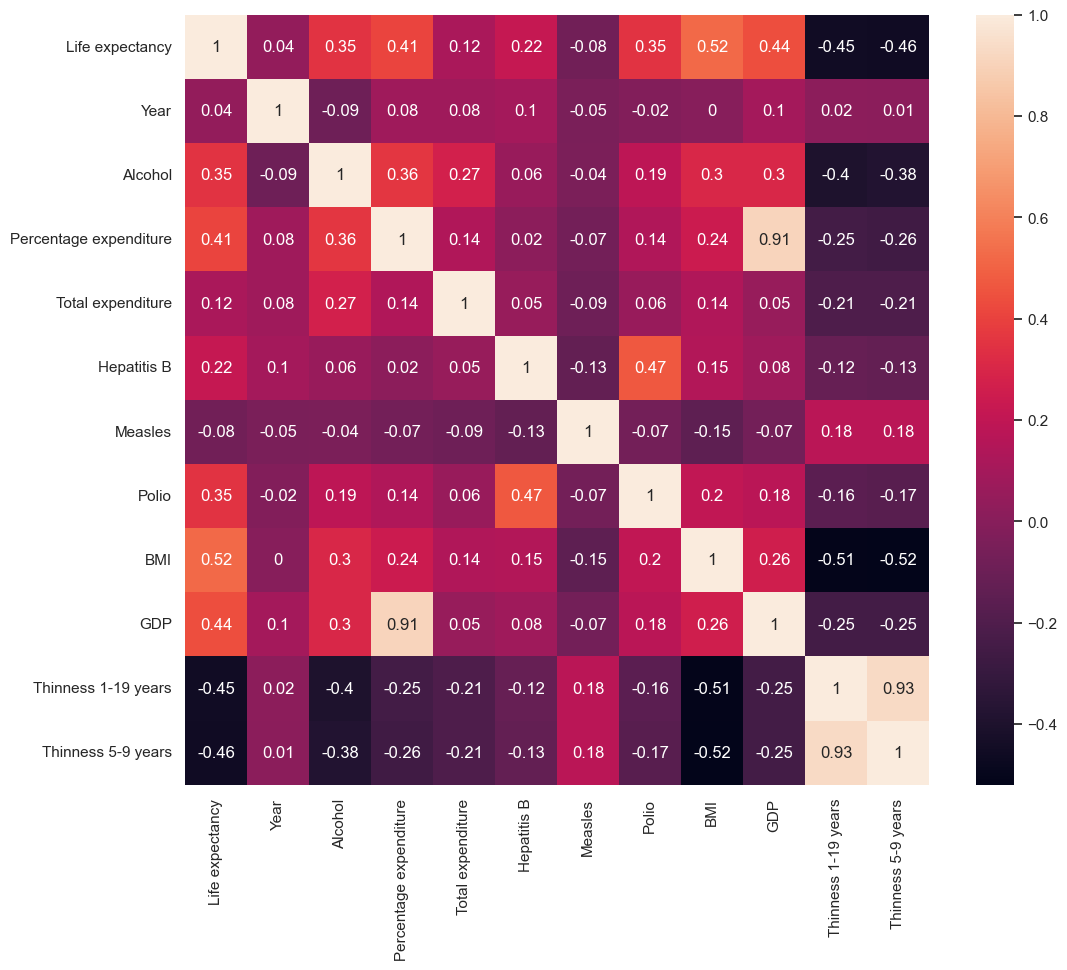

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns   # 시각화를 위하여 Seaborn 라이브러리를 이용함

sns.set(rc={'figure.figsize':(12,10)}) 
correlation_matrix = life.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

#### 어떤 특징들이 서로 상관관계가 있을까

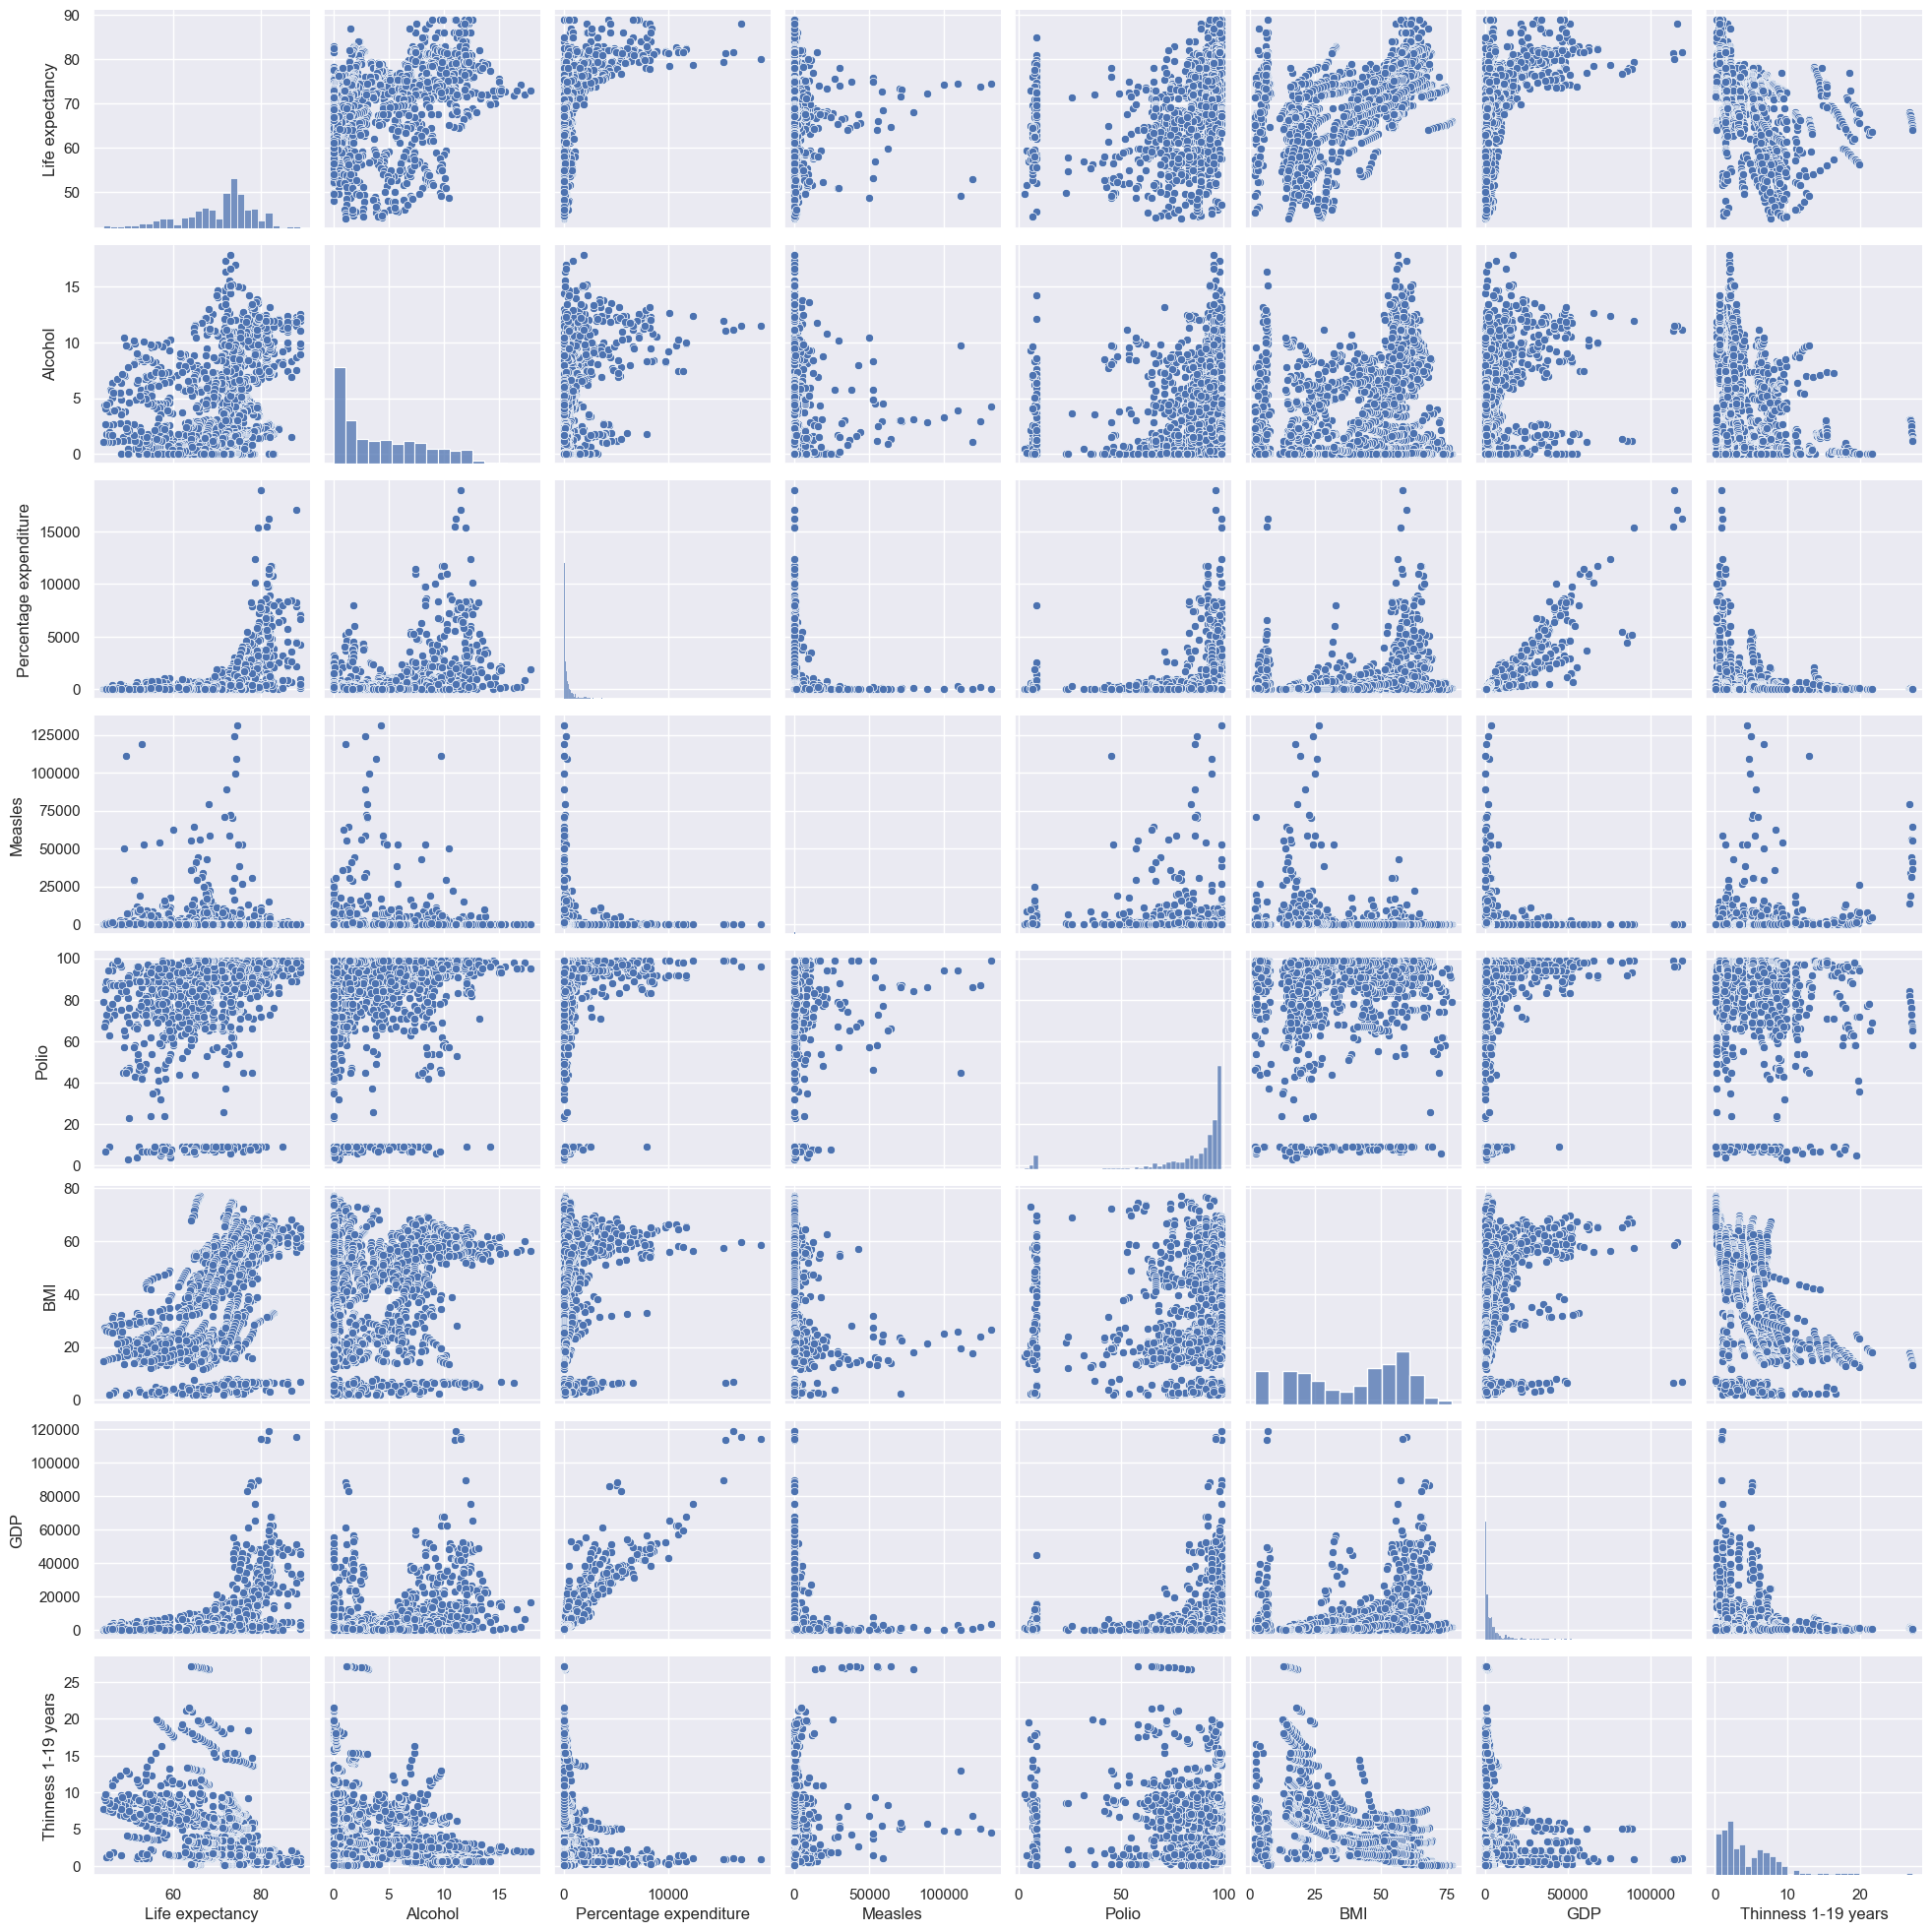

In [49]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()

### 14.16 간단한 회귀모델을 만들자

In [50]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
from sklearn.linear_model import LinearRegression 
lin_model = LinearRegression() 
lin_model.fit(X_train, y_train)
y_test_predict = lin_model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error 
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict)) 
print('RMSE =', rmse)

RMSE = 6.524492476080889


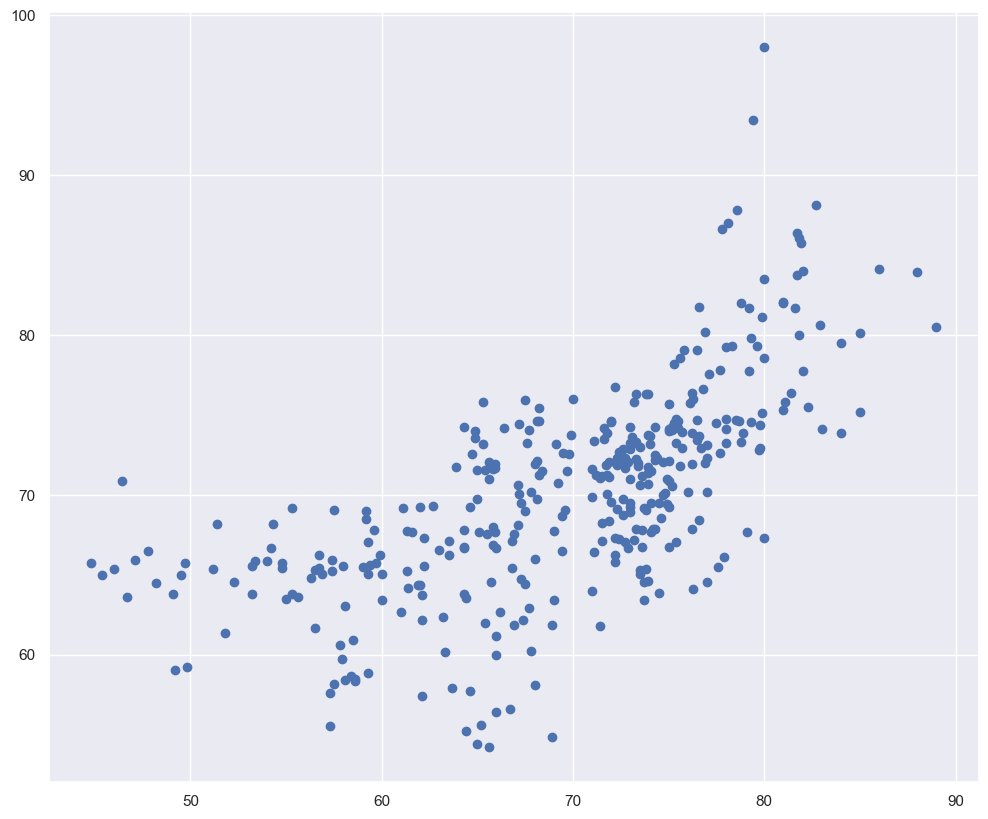

In [54]:
plt.scatter(y_test, y_test_predict) 
plt.show()